# Medical Cost Personal Insurance Project


Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

Columns                                            

•	age: age of primary beneficiary

•	sex: insurance contractor gender, female, male

•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

•	children: Number of children covered by health insurance / Number of dependents

•	smoker: Smoking

•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

•	charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?


Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv


In [81]:
# Import necessory libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import joblib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [82]:
# download data file in local system
data = pd.read_csv(r'C:\Assignements & HW\Internship\project1\medical_cost_insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Exploratory Data Analysis (EDA)

In [83]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [84]:
# check the shape of dataset
data.shape

(1338, 7)

In [85]:
# Check the information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [86]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# There are no missing values as such

In [87]:
data['region'].value_counts().sort_values()

northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64

In [88]:
data['children'].value_counts().sort_values()

5     18
4     25
3    157
2    240
1    324
0    574
Name: children, dtype: int64

# Converting Categorical Features to Numerical

In [89]:
# Replace label column into binary codes

data['sex'] = data['sex'].replace({'male':0,'female':1}) 
data['smoker'] = data['smoker'].replace({'no':0, 'yes':1})
data['region'] = data['region'].replace({'northwest':0, 'northeast':1,'southeast':2, 'southwest':3})

In [90]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


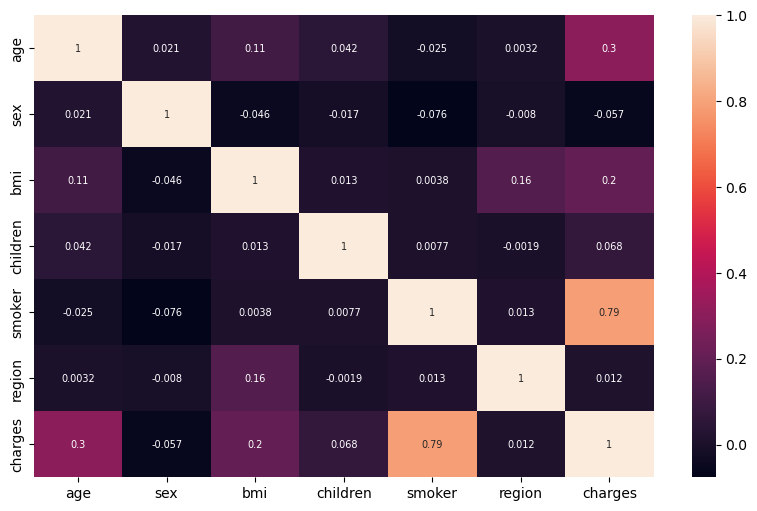

In [91]:
# Plotting Heatmap (Correlation matrix)
df_corr = data.corr() 

plt.figure(figsize=(10,6))
sns.heatmap(df_corr, annot=True, annot_kws={'size':7})
plt.show()

# Smoker , BMI and Age are most important factor that determines - chaarges

Also we see that Sex, Children and Region do not affect the Charges. We might drop these 3 columns as they have less correlation


In [92]:
print(data['sex'].value_counts().sort_values())
print(data['smoker'].value_counts().sort_values())
print(data['region'].value_counts().sort_values())

1    662
0    676
Name: sex, dtype: int64
1     274
0    1064
Name: smoker, dtype: int64
1    324
3    325
0    325
2    364
Name: region, dtype: int64


Now we are confirmed that there are no other values in above pre-preocessed column, We can proceed with EDA

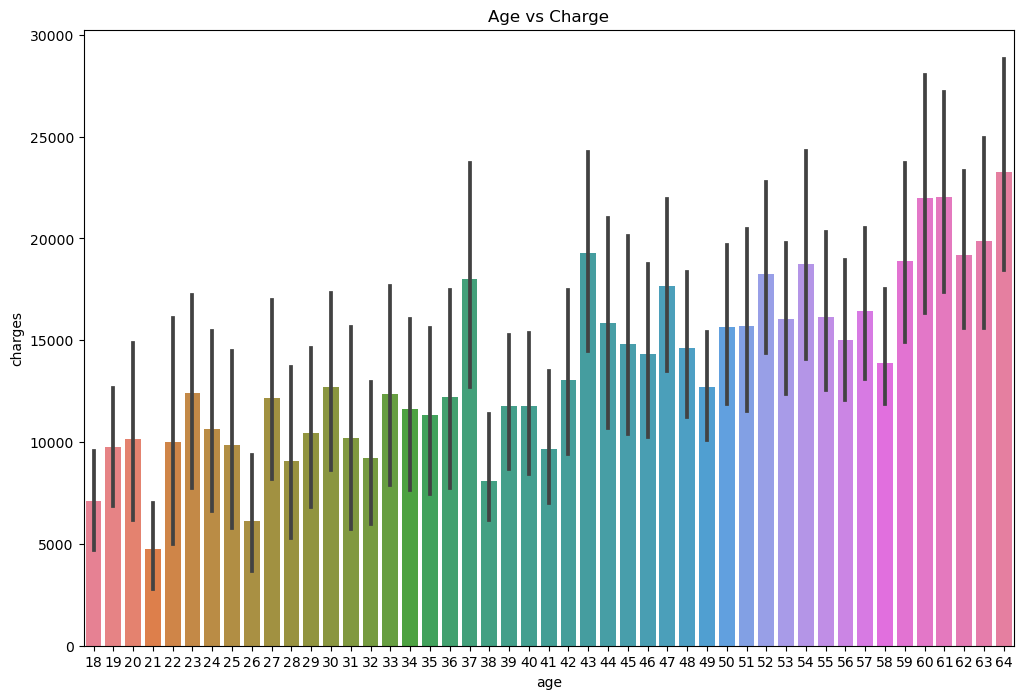

In [93]:
# Age v/s charges using barplot

plt.figure(figsize=(12,8))
plt.title('Age vs Charge')
sns.barplot(x='age', y='charges', data=data, palette='husl')
plt.show()           

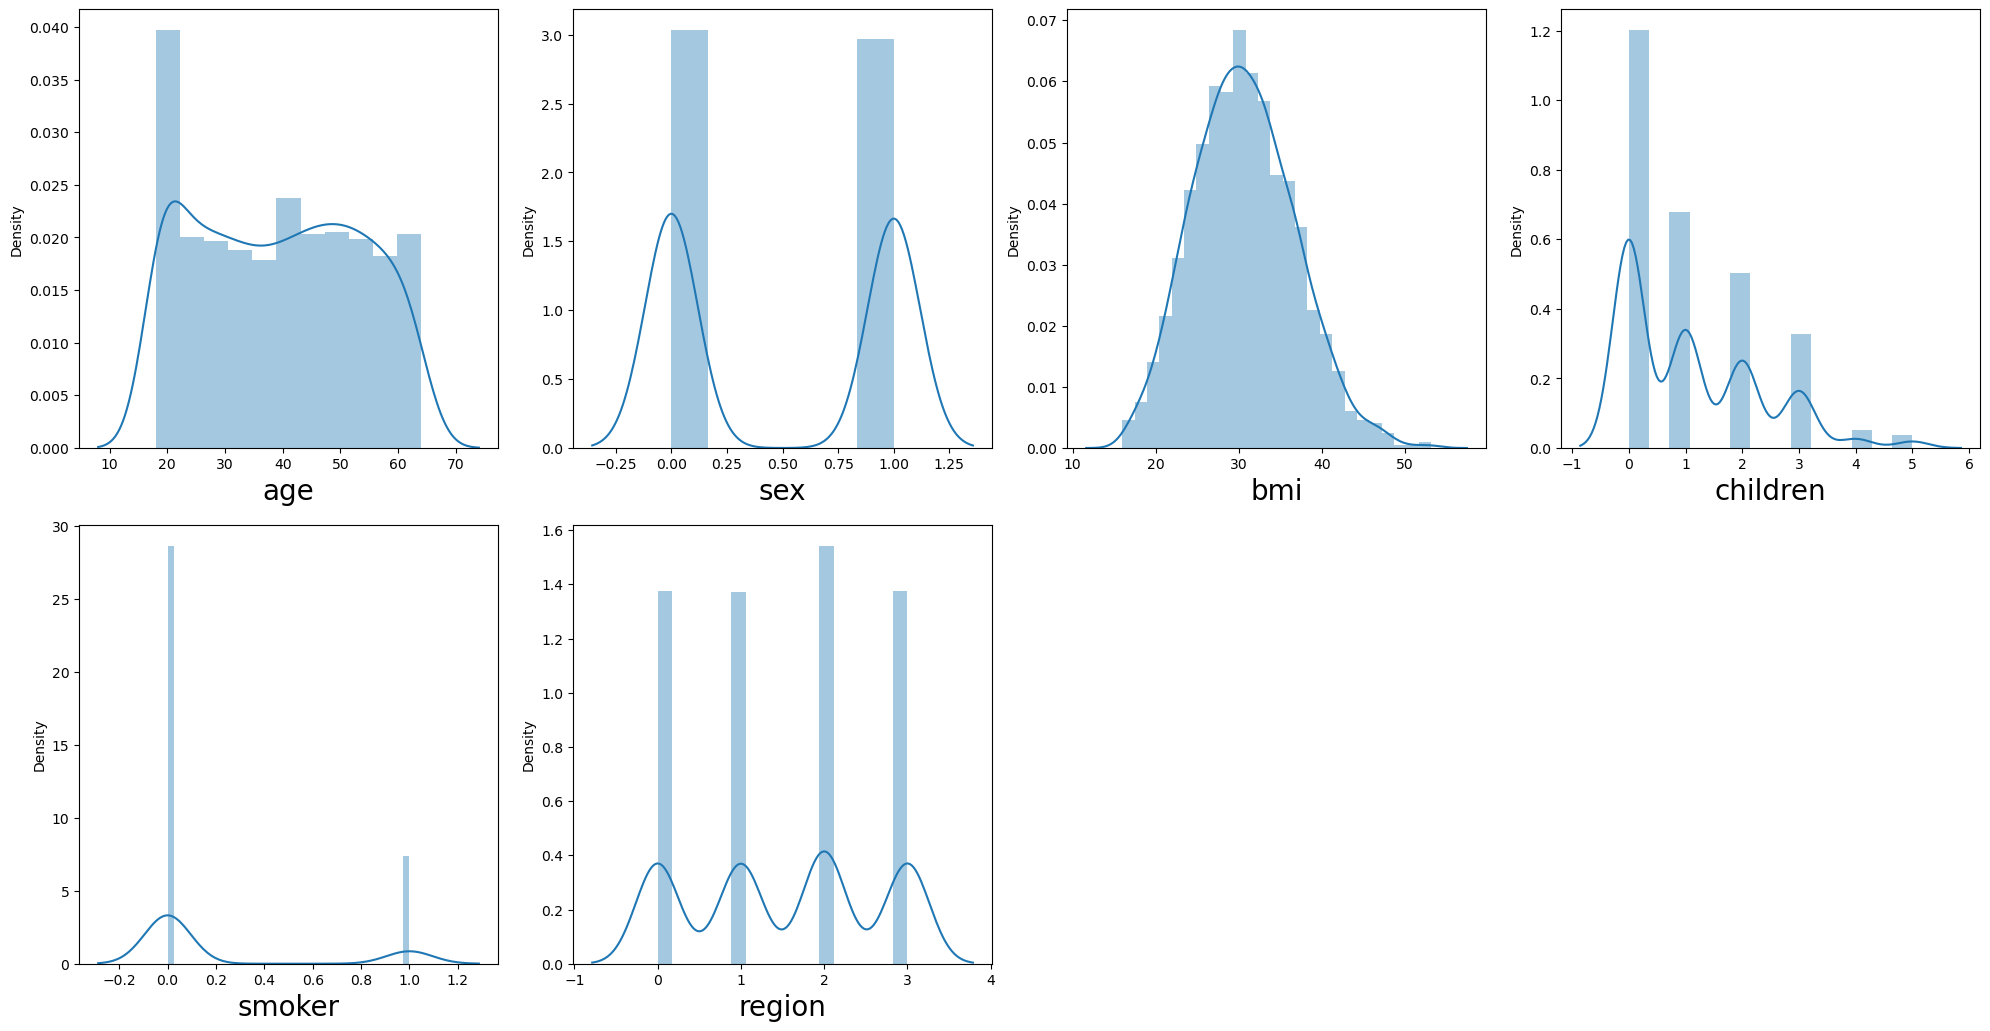

In [94]:
# draw the distplot all the features to identify the distribution of data.

plt.figure(figsize=(20,15))
plotnumber =1
for column in data[['age','sex','bmi','children','smoker','region','charges']]:
    if plotnumber <=6:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

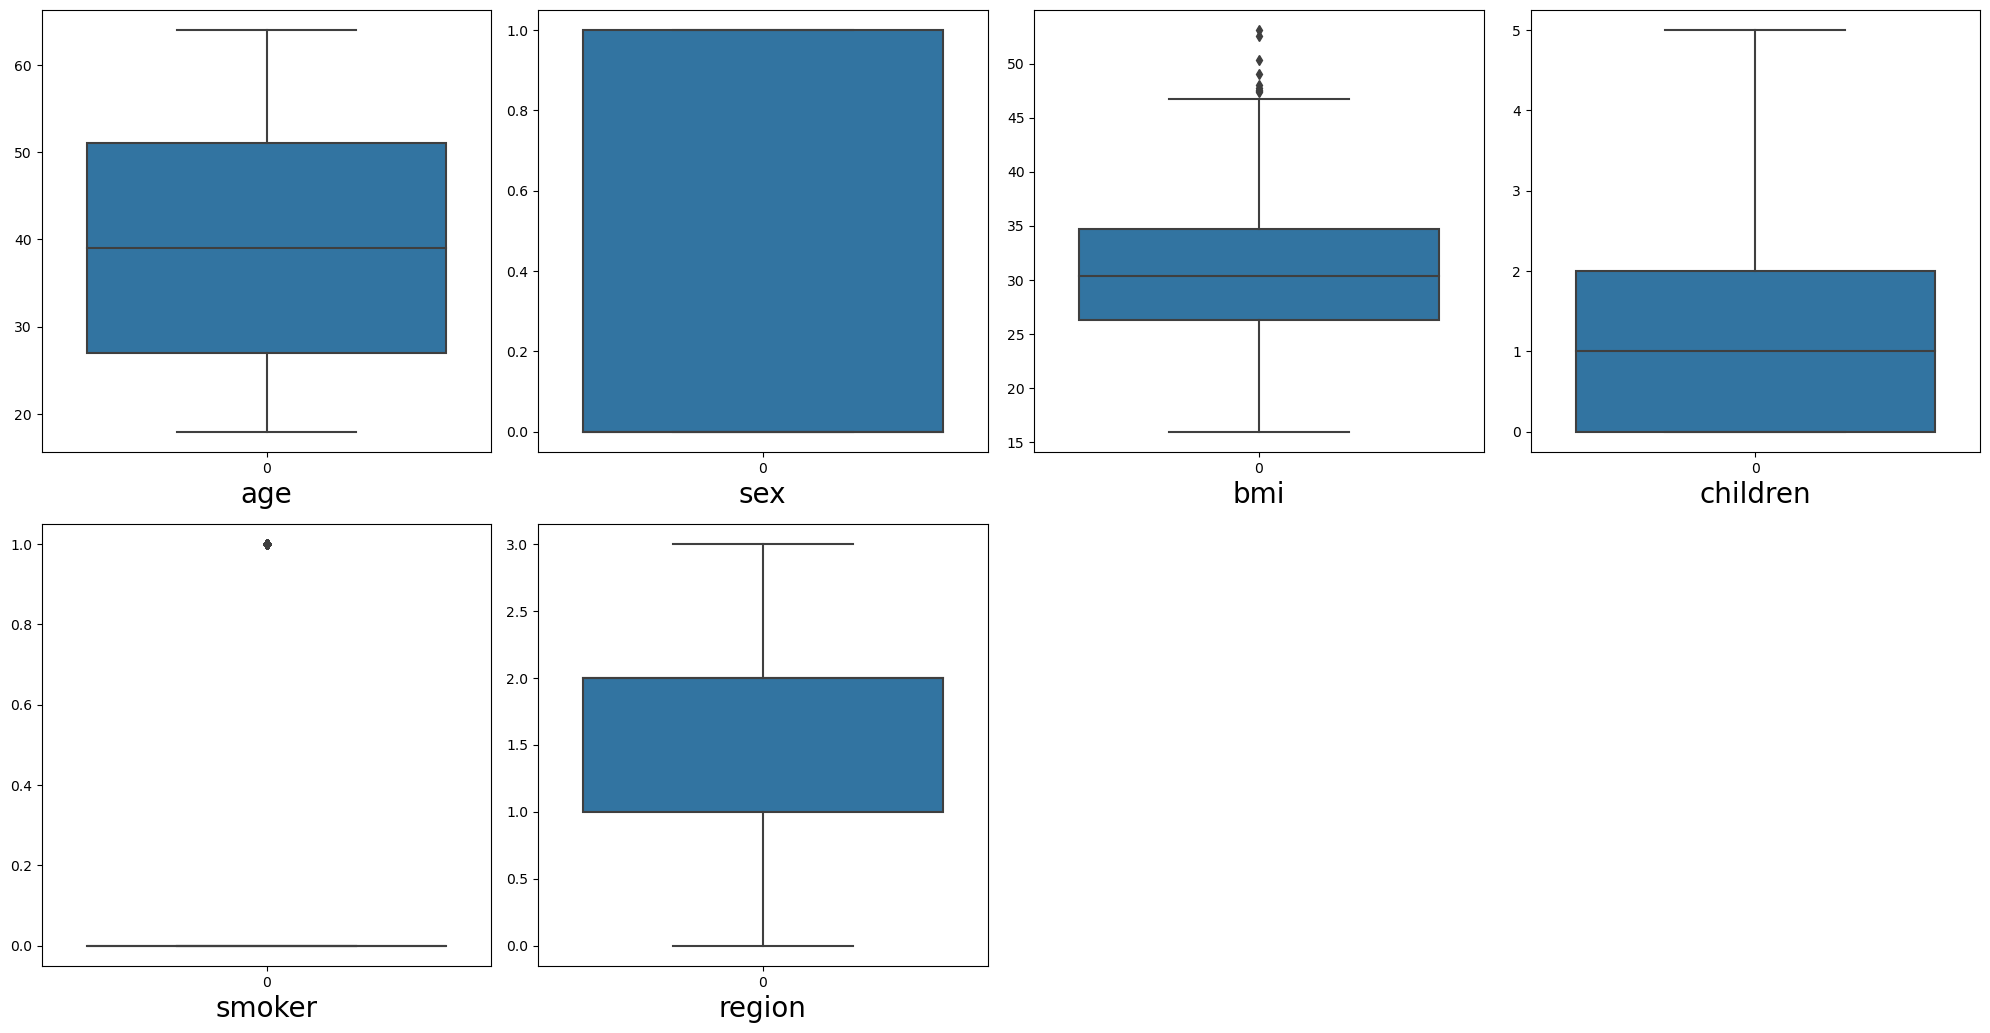

In [95]:
# Using the barplot draw the data to identify outliers

plt.figure(figsize=(20,15))
plotnumber =1
for column in data[['age','sex','bmi','children','smoker','region','charges']]:
    if plotnumber <=6:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

<Axes: title={'center': 'Region vs Charge'}, xlabel='region', ylabel='charges'>

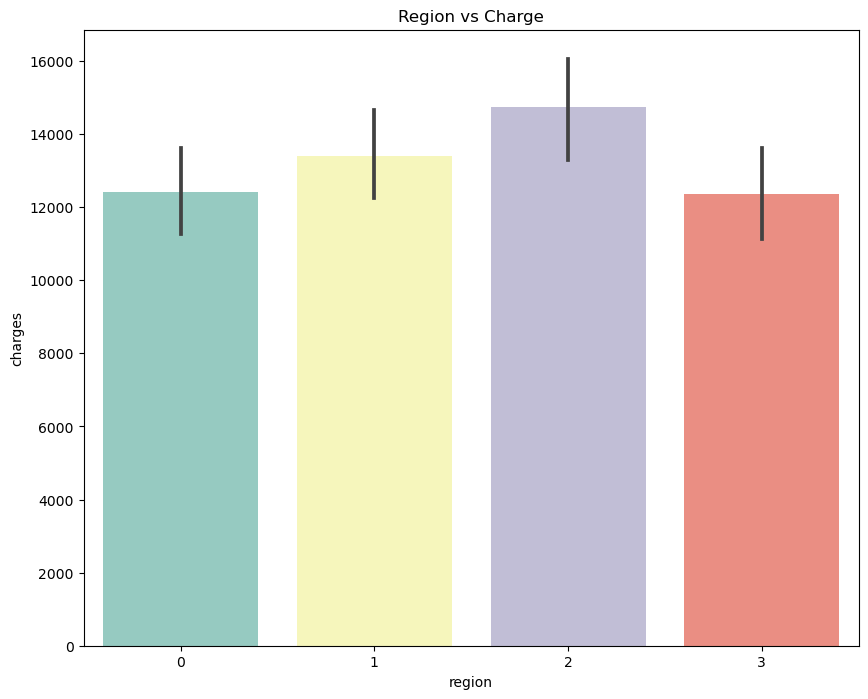

In [96]:
# Using the barplot region v/s charges
plt.figure(figsize=(10,8))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=data,palette='Set3')

Text(0.5, 1.0, 'BMI VS Charge')

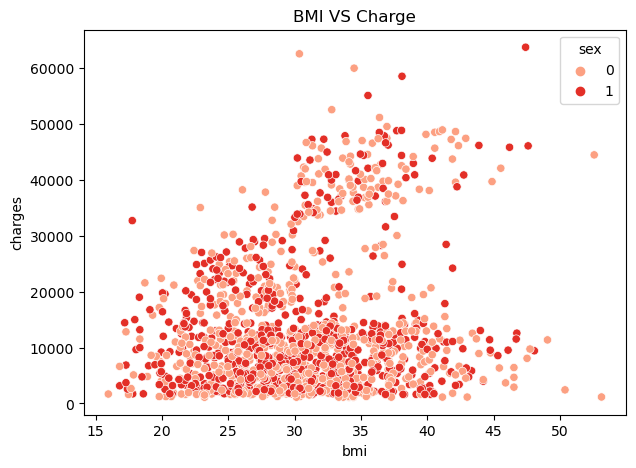

In [97]:
# Using the scatterlot BMI v/s charges

plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=data,palette='Reds')
plt.title('BMI VS Charge')

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

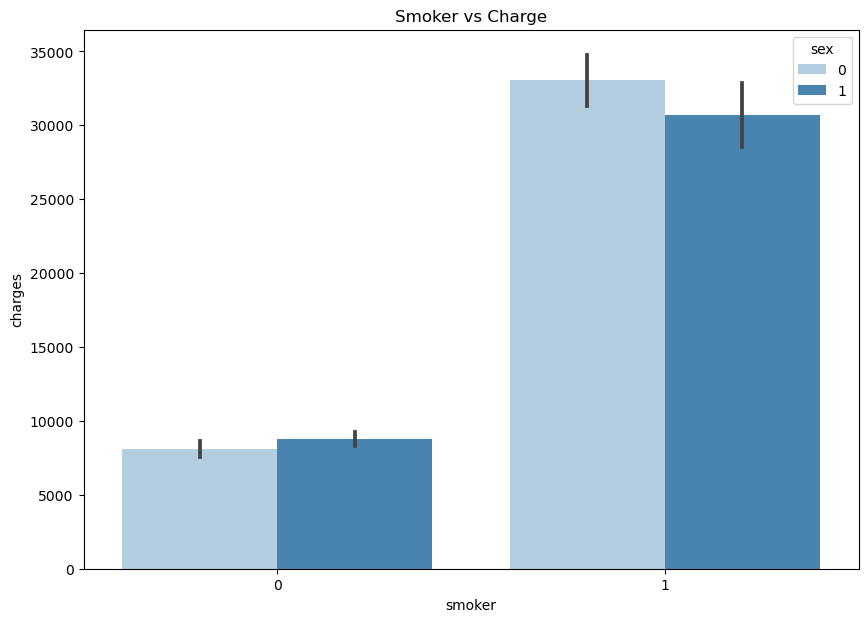

In [98]:
# # Using the barplot smoker v/s charges

plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=data,palette='Blues',hue='sex')

Smoking clearly show impact the traget variable directly.

<Axes: title={'center': 'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

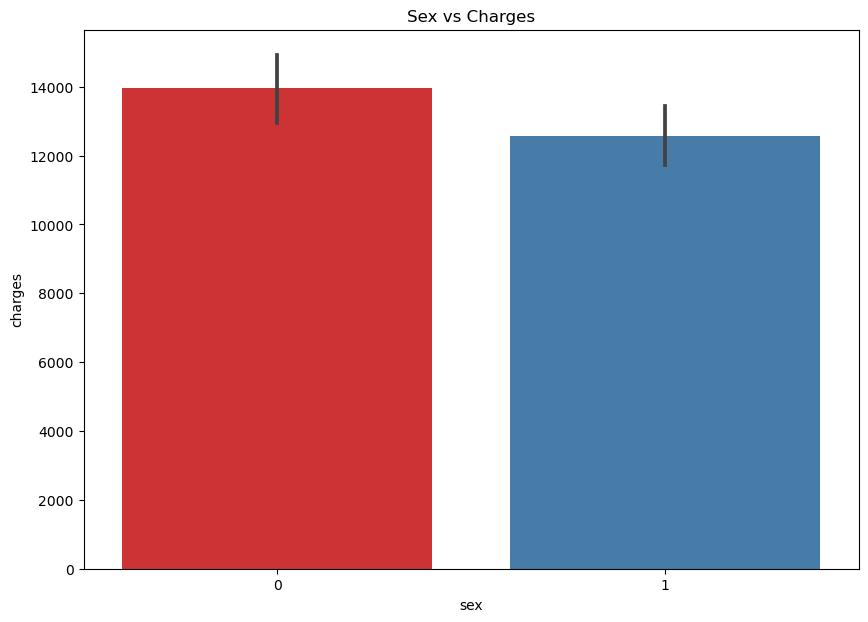

In [99]:
# Using the barplot sex v/s charges

plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=data,palette='Set1')

In [100]:
data.skew()

age         0.055673
sex         0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.037853
charges     1.515880
dtype: float64

Text(0, 0.5, 'Count')

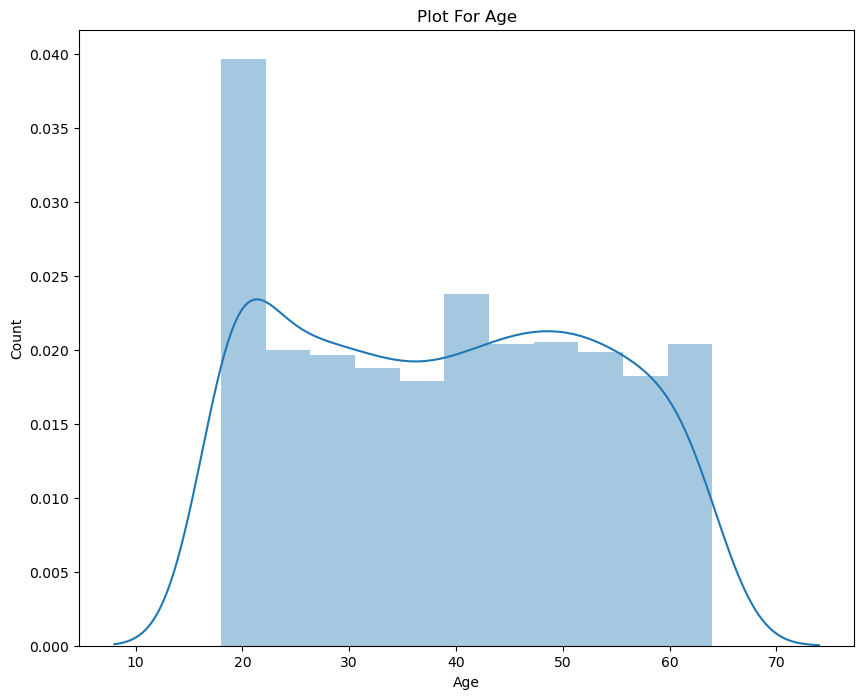

In [101]:
# Using the distplot Age count

plt.figure(figsize=(10,8))
sns.distplot(data['age'])
plt.title('Plot For Age')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

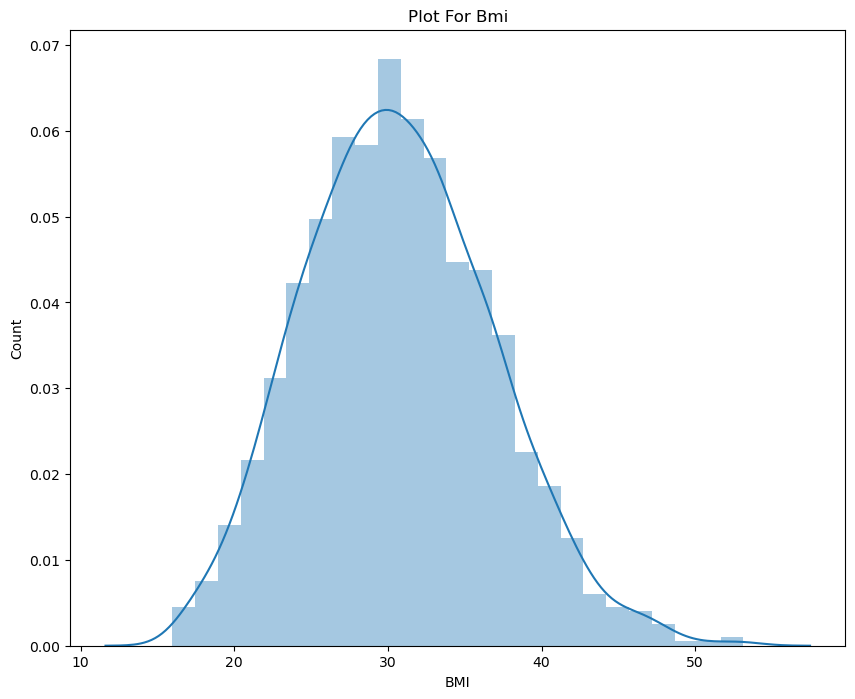

In [102]:
# Using the sidtplot BMI count
plt.figure(figsize=(10,8))
sns.distplot(data['bmi'])
plt.title('Plot For Bmi')
plt.xlabel('BMI')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

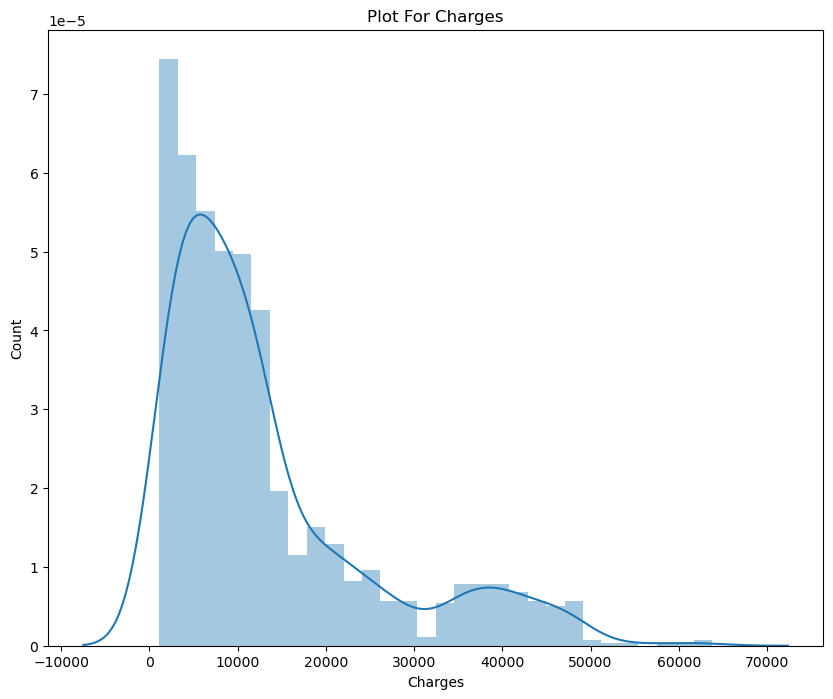

In [103]:
# Using the sidtplot charges count
plt.figure(figsize=(10,8))
sns.distplot(data['charges'])
plt.title('Plot For Charges')
plt.xlabel('Charges')
plt.ylabel('Count')

There might be few outliers in Charges but then we cannot say that the value is an outlier as there might be cases in which Charge for medical was very les actually.

# Separating features and label

In [104]:
x = data.drop("charges",axis = 1)
y = data["charges"]

# Feature scaling using standard Scalarization

In [105]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.438764,1.010519,-0.453320,-0.908614,1.970587,1.343746
1,-1.509965,-0.989591,0.509621,-0.078767,-0.507463,0.438898
2,-0.797954,-0.989591,0.383307,1.580926,-0.507463,0.438898
3,-0.441948,-0.989591,-1.305531,-0.908614,-0.507463,-1.370796
4,-0.513149,-0.989591,-0.292556,-0.908614,-0.507463,-1.370796
...,...,...,...,...,...,...
1333,0.768473,-0.989591,0.050297,1.580926,-0.507463,-1.370796
1334,-1.509965,1.010519,0.206139,-0.908614,-0.507463,-0.465949
1335,-1.509965,1.010519,1.014878,-0.908614,-0.507463,0.438898
1336,-1.296362,1.010519,-0.797813,-0.908614,-0.507463,1.343746


# Creating the training and testing data sets 

In [117]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

print('Size of X_train : ', x_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', x_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1070, 6)
Size of y_train :  (1070,)
Size of X_test :  (268, 6)
Size of Y_test :  (268,)


In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

# Linear Regression

In [125]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [126]:
cv_lr = cross_val_score(estimator = lr, X = X, y = y, cv = 10)

y_pred_lr_train = lr.predict(X_train)
r2_score_lr_train = r2_score(y_train, y_pred_lr_train)

y_pred_lr_test = lr.predict(X_test)
r2_score_lr_test = r2_score(y_test, y_pred_lr_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_lr_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_lr.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_lr_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_lr_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

CV Linear Regression : 0.745
R2_score (train) : -0.769
R2_score (test) : -0.629
RMSE : 15902.775


# Support Vector Machine (Regression)

In [129]:
svr=SVR()
svr.fit(x_train, y_train)

SVR()

In [130]:
parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }
svr_grid = GridSearchCV(estimator=svr, param_grid=parameters, cv=10, verbose=4, n_jobs=-1)
svr_grid.fit(x_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                         'kernel': ['rbf', 'sigmoid'], 'tol': [0.0001]},
             verbose=4)

In [131]:
svr = SVR(C=10, gamma=0.1, tol=0.0001)
svr.fit(x_train, y_train)
print(svr_grid.best_estimator_)
print(svr_grid.best_score_)

SVR(C=100, kernel='sigmoid', tol=0.0001)
0.477363135012591


In [132]:
cv_svr = svr_grid.best_score_

y_pred_svr_train = svr.predict(x_train)
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

y_pred_svr_test = svr.predict(x_test)
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))

print('CV : {0:.3f}'.format(cv_svr.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_svr_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_svr_test))
print('RMSE : {0:.3f}'.format(rmse_svr))

CV : 0.477
R2_score (train) : -0.040
R2 score (test) : -0.013
RMSE : 12542.121


# Ridge Regressor

In [133]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

steps = [ ('scalar', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),
        ('model', Ridge())]

ridge_pipe = Pipeline(steps)

In [135]:
parameters = { 'model__alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2,1,2,5,10,20,25,35, 43,55,100], 'model__random_state' : [42]}
gr = GridSearchCV(ridge_pipe, parameters, cv=10)
gr = gr.fit(x_train, y_train)

In [136]:
gr.best_estimator_, gr.best_score_

(Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                 ('model', Ridge(alpha=20, random_state=42))]),
 0.8259990140429396)

In [138]:
ridge = Ridge(alpha=20, random_state=42)
ridge.fit(x_train, y_train)
cv_ridge = gr.best_score_

y_pred_ridge_train = ridge.predict(x_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

y_pred_ridge_test = ridge.predict(x_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_linear_reg_test)))
print('CV : {0:.3f}'.format(cv_ridge.mean()))
print('R2 score (train) : {0:.3f}'.format(r2_score_ridge_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_ridge_test))
print('RMSE : {0:.3f}'.format(rmse_ridge))


CV : 0.826
R2 score (train) : 0.741
R2 score (test) : 0.782
RMSE : 15902.775


In [151]:
models = [('Linear Regression', rmse_linear, r2_score_linear_reg_train, r2_score_linear_reg_test, cv_linear_reg.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean())
          ]

In [152]:
# create dataframe all the models we create 

predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,15902.774713,-0.768683,-0.628988,0.742820
1,Ridge Regression,15902.774713,0.741152,0.781595,0.825999
2,Support Vector Regression,12542.121350,-0.039605,-0.013244,0.477363


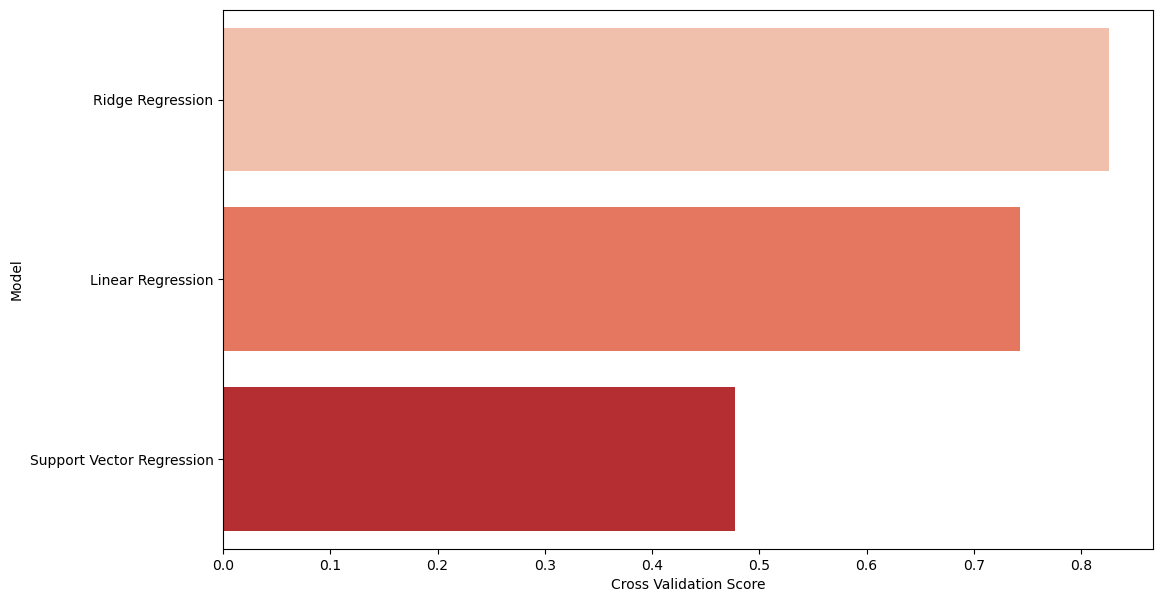

In [153]:
# Draw the barplot to easly identify which one model is the best.

plt.figure(figsize=(12,7))
predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model',data = predict, palette='Reds')
plt.xlabel('Cross Validation Score')
plt.ylabel('Model')
plt.show()

In [154]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

print('Size of X_train : ', x_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', x_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1070, 6)
Size of y_train :  (1070,)
Size of X_test :  (268, 6)
Size of Y_test :  (268,)


In [155]:
parameters = { 'model__alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2,1,2,5,10,20,25,35, 43,55,100], 'model__random_state' : [42]}
gr = GridSearchCV(ridge_pipe, parameters, cv=10)
gr = gr.fit(x_train, y_train)

In [156]:
gr.best_estimator_, gr.best_score_

(Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                 ('model', Ridge(alpha=20, random_state=42))]),
 0.8259990140429396)

In [158]:
ridge = Ridge(alpha=20, random_state=42)
ridge.fit(x_train, y_train)
cv_ridge = gr.best_score_

y_pred_ridge_train = ridge.predict(x_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

y_pred_ridge_test = ridge.predict(x_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)


print('R2 score (train) : {0:.3f}'.format(r2_score_ridge_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_ridge_test))



R2 score (train) : 0.741
R2 score (test) : 0.782


# Saving the model

In [160]:
import joblib
joblib.dump(gr, "Medical_cost_predictio.pkl")

['Medical_cost_predictio.pkl']

# Predicting the saved model

In [161]:
# Let's load the saved model and get the prediction 

model = joblib.load("Medical_cost_predictio.pkl")

# Prediction 

prediction = model.predict(x_test)
prediction

array([10711.79171912,  6512.24913249, 32731.42054379, 10768.16293853,
       28889.75586139,  4270.43350154,  3569.95685708, 15539.60957756,
        4019.53488879, 12115.2740519 , 20042.75708114,  9409.75747999,
        6279.05158996, 50162.75109342, 53204.06164215, 46000.67182031,
       10869.87278334, 42562.70764393, 10258.39485655, 25631.87390174,
        3912.41849286,  8375.69816244,  2338.19646473,  3869.29555027,
       13196.21403817, 12081.33687658, 13998.06575659,  8811.35884291,
       11429.41574443,  3162.7169692 ,  8840.96327997, 12534.68471271,
        3841.34372333,  7598.13779151,  3967.67964305,  8659.8926417 ,
        4128.61226599,  8673.29661635, 24777.92784955, 37587.65528898,
        5441.17994999,  5173.50470346, 12822.42009972, 12515.98183502,
        6842.93656194, 13976.34917261,  7197.80008411,  5498.44683431,
       40776.95471791,  6219.96091425, 15625.3343074 ,  3949.02612455,
        8317.48485548,  3347.87837694, 12846.7201006 , 12118.53837629,
      

In [162]:
a = np.array(y_test)
data = pd.DataFrame()
data["Predicted"]=prediction
data["Original"]=a
data

,Predicted,Original
0,10711.791719,9095.06825
1,6512.249132,5272.17580
2,32731.420544,29330.98315
3,10768.162939,9301.89355
4,28889.755861,33750.29180
...,...,...
263,46835.857403,47055.53210
264,12558.206874,12222.89830
265,7703.693951,6067.12675
266,57714.284171,63770.42801
